In [1]:
import numpy as np
import numpy.random as r
import matplotlib.pyplot as p

In [2]:
def f(x,y):
    #return x**4 + y**4 - 3*x*x*y - 10*y*y*x
    return -(x**2 + 2*y**2 - 0.3*np.cos(9*x-3) - 0.4*np.cos(12*y+2))

def inherit(p1, p2):
    l1 = r.rand()
    l2 = r.rand()
    child = [l1*p1[0]+(1-l1)*p2[0], l2*p1[1]+(1-l2)*p2[1], 0]
    return child

In [3]:
N = 100
generations = 200
avgfitness = np.zeros((generations,1))
fitness0 = np.zeros((100,1))
partens_frac = 0.5 #=1-_frac
epsilon = 1e-10



In [4]:
Npar = int(N*partens_frac)
Nchil = N-Npar

In [5]:
a = np.random.uniform(low=-10, high=10, size=(100,2))

In [6]:
A=np.column_stack((a,fitness0))

In [7]:
#Loop
g=0
converged = False
convergedg = 0

while (g < generations):
    #determine fitness
    A[:,2] = f(A[:,0],A[:,1]) #third column of A is fitness
    #calc. average fitness of generation
    curravgfit = np.sum(A,axis=0)[2]/N
    avgfitness[g] = curravgfit
    
    
    if (g>1):
        if ((avgfitness[g] - avgfitness[g-1]) < epsilon and convergedg == 0): # and convergedg == 0
            convergedg = g-1
            Aout = Aold
            converged = True
            
            
    #select best parents as better half
    Parents = A[A[:, 2].argsort()][Npar:]
    #let them have children by combining A0 and A1 genes
    pairindices = r.randint(Npar, size=(Nchil,2)) #random pairing indices
    Children = np.zeros((Nchil,3)) #initialize as 0
    for i in range(Nchil):
        Children[i] = inherit(Parents[pairindices[i,0]],Parents[pairindices[i,1]])
    Aold=A
    A=np.row_stack((Parents,Children))

    #this is new generation
    g = g+1

In [8]:
avgfitness

array([[-1.01384786e+02],
       [-4.42698597e+01],
       [-1.85707840e+01],
       [-7.81404207e+00],
       [-2.22915749e+00],
       [-9.21265198e-01],
       [-3.50995188e-01],
       [ 1.28982399e-02],
       [ 1.93067665e-01],
       [ 3.12863225e-01],
       [ 4.32581065e-01],
       [ 4.27509925e-01],
       [ 4.56795041e-01],
       [ 4.86096017e-01],
       [ 5.36557930e-01],
       [ 5.41434810e-01],
       [ 5.43833744e-01],
       [ 5.44929119e-01],
       [ 5.45250194e-01],
       [ 5.45366890e-01],
       [ 5.45407974e-01],
       [ 5.45421284e-01],
       [ 5.45425778e-01],
       [ 5.45427937e-01],
       [ 5.45428864e-01],
       [ 5.45429278e-01],
       [ 5.45429424e-01],
       [ 5.45429459e-01],
       [ 5.45429467e-01],
       [ 5.45429469e-01],
       [ 5.45429469e-01],
       [ 5.45429470e-01],
       [ 5.45429470e-01],
       [ 5.45429470e-01],
       [ 5.45429470e-01],
       [ 5.45429470e-01],
       [ 5.45429470e-01],
       [ 5.45429470e-01],
       [ 5.4

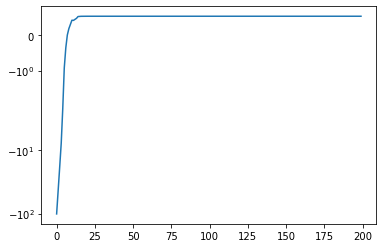

In [9]:
p.plot(avgfitness)
p.yscale('symlog')
p.show()

In [10]:
convergedg

10

In [11]:
Aout

array([[-0.35405439, -0.08277482,  0.37340094],
       [-0.22287608, -0.16347569,  0.38337452],
       [-0.29179786, -0.09193447,  0.38514733],
       [ 0.19091312, -0.13681529,  0.38622707],
       [-0.24803046, -0.19447536,  0.38980789],
       [-0.43082823, -0.14300218,  0.40603509],
       [ 0.27556792, -0.22061094,  0.40616471],
       [ 0.19992348, -0.14588503,  0.41360675],
       [ 0.27623575, -0.21850021,  0.41454783],
       [ 0.36444288, -0.20707641,  0.42362339],
       [-0.40963236, -0.13244618,  0.43976964],
       [-0.39610284, -0.19126074,  0.44081899],
       [-0.39610284, -0.19126074,  0.44081899],
       [ 0.21638494, -0.1457151 ,  0.44674698],
       [ 0.218876  , -0.16989614,  0.4484794 ],
       [ 0.24411109, -0.11592912,  0.45001845],
       [ 0.24411109, -0.11592912,  0.45001845],
       [ 0.38630459, -0.13805018,  0.455848  ],
       [ 0.2497121 , -0.11763643,  0.46168344],
       [-0.40005759, -0.16895739,  0.46773091],
       [ 0.30580054, -0.10427614,  0.468